In [52]:

# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.datasets import make_blobs

# To scale the data  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


# To tune model, get different metric scores, and split data
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
data_weather = pd.read_csv('/Users/gloriacarrascal/trabajo-grado/data/weather&target_var_by3hour.csv', 
                           parse_dates=['Datetime'])

In [3]:
data_weather.head()

,Datetime,altitud,longitud,latitud,dirviento,nubosidad,temperatura,vapor,velviento,rocio,irradiancia
0,2016-01-01 07:00:00,8.0,-75.147875,10.682514,243.75,1.888889,25.442593,28.309010,2.933333,23.028751,331.426636
1,2016-01-01 13:00:00,8.0,-75.147875,10.682514,333.75,1.840909,31.688710,29.500994,4.158333,23.967548,296.081851
2,2016-01-01 19:00:00,8.0,-75.147875,10.682514,202.50,2.023256,27.914894,29.717486,3.825000,23.755991,0.307992
3,2016-01-02 07:00:00,8.0,-75.147875,10.682514,127.50,2.094340,24.778571,28.220148,2.541667,23.010454,305.102064
4,2016-01-02 13:00:00,8.0,-75.147875,10.682514,356.25,1.823529,31.346032,28.558100,3.766667,23.185466,336.786659


In [4]:
#convert time to date time
data_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
altitud,815.0,16.185897,4.144681,8.000000,14.000000,18.000000,20.000000,20.000000
longitud,815.0,-75.510366,0.356985,-75.825139,-75.813514,-75.714352,-75.326114,-74.779722
latitud,815.0,9.570779,0.790637,8.825833,8.832681,9.370870,10.068185,10.917778
dirviento,815.0,289.436171,55.426143,75.000000,251.250000,302.555556,337.500000,361.000000
nubosidad,815.0,1.771776,0.310086,1.129032,1.518519,1.733333,1.972474,2.700000
temperatura,815.0,28.165068,3.016815,23.087179,25.467054,27.807317,30.882778,34.808929
vapor,815.0,29.174930,1.205617,25.272594,28.410458,29.333353,30.058684,32.052538
velviento,815.0,2.301749,1.903623,0.000000,0.916667,1.700000,3.279167,9.516667
rocio,815.0,23.515393,0.687881,21.224793,23.074405,23.600735,24.017936,25.113298
irradiancia,815.0,247.450194,181.136293,0.000000,0.968109,335.404467,400.848215,517.181494


In [5]:
data_weather.shape

(815, 11)

In [6]:
data_weather['nubosidad'] = data_weather.iloc[:,5]
data_weather['dirviento'] = data_weather.iloc[:,6]
data_weather['latitud'] = data_weather.iloc[:,8]
data_weather['longitud'] = data_weather.iloc[:,9]
data_weather['altitud'] = data_weather.iloc[:,7]

In [7]:
# Defining the hist_box() function
def hist_box(data,col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
    # Adding a graph in each part
    sns.boxplot(data[col], ax=ax_box, showmeans=True)
    sns.distplot(data[col], ax=ax_hist)
    plt.xlabel('Irradiancia solar (kWm$^-2$)')
    plt.show()

Text(0.5, 1.0, 'Longitud, [estandar WGS84]')

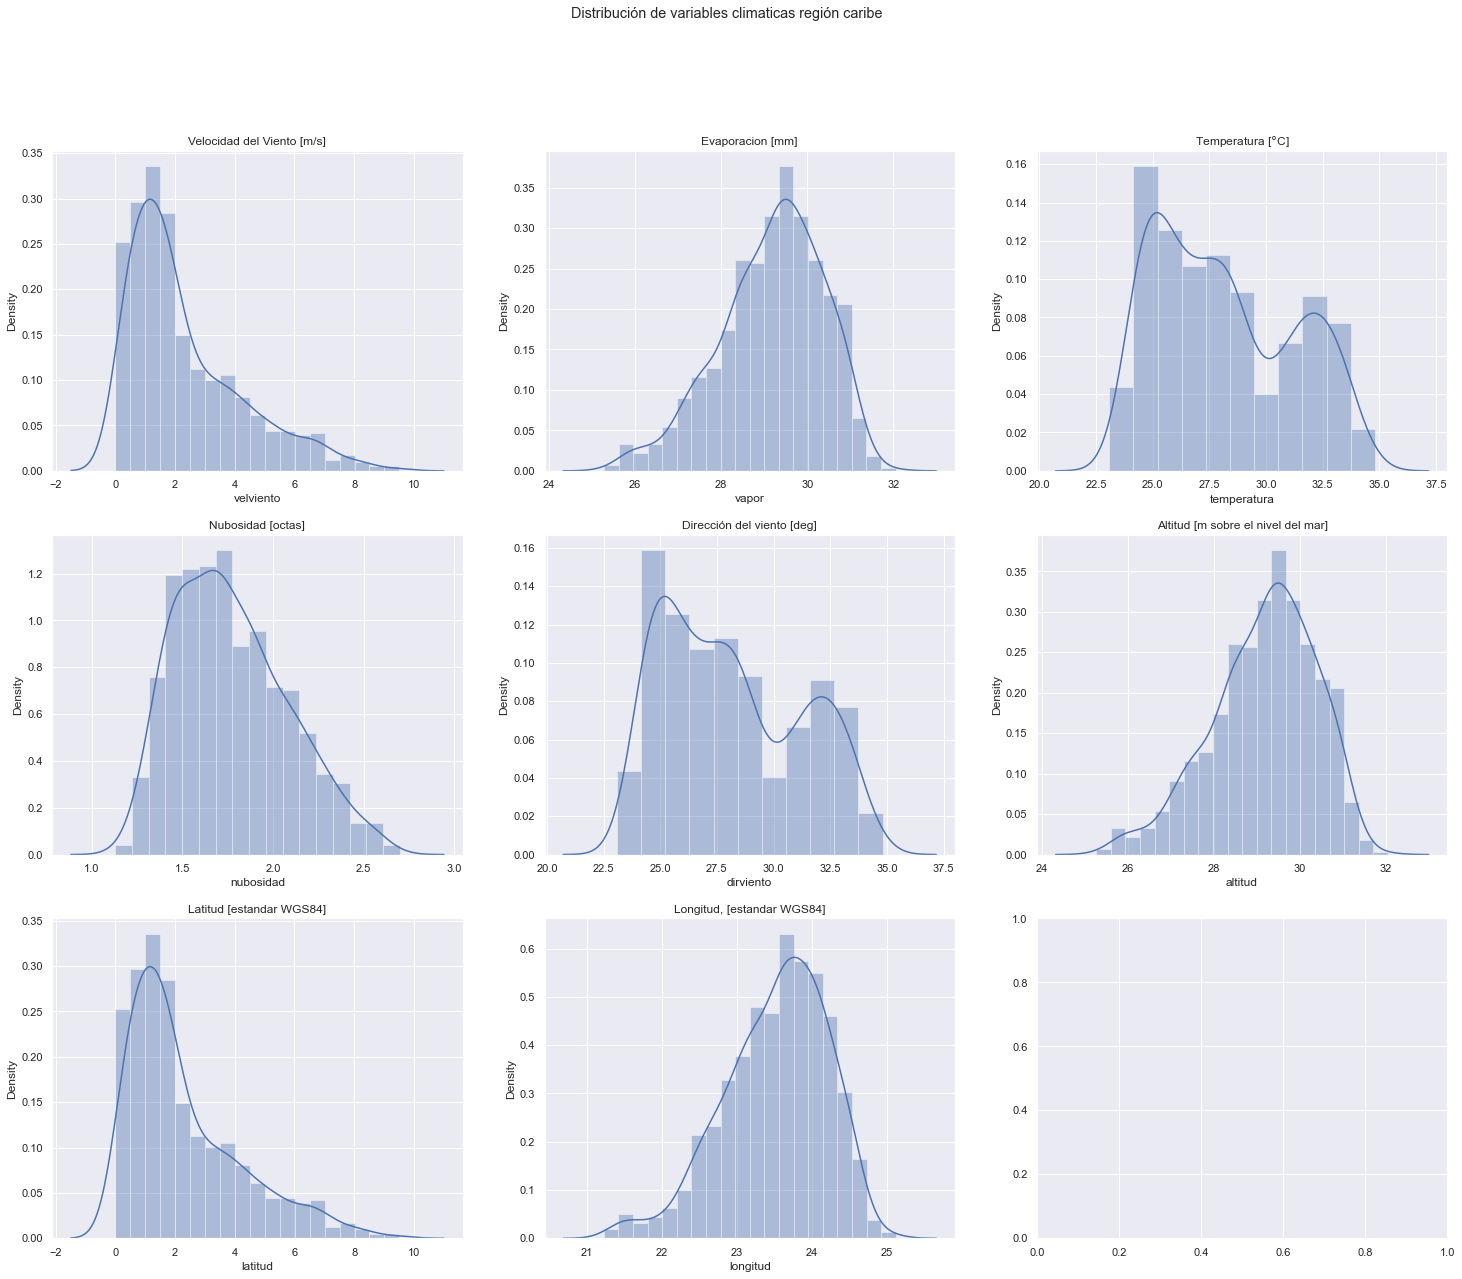

In [9]:
#plotting disstribution of weather variables

fig, axes = plt.subplots(3, 3, figsize = (25, 20))  
fig.suptitle('Distribución de variables climaticas región caribe')
sns.distplot(data_weather['velviento'], ax=axes[0,0]).set_title('Velocidad del Viento [m/s]')
sns.distplot(data_weather['vapor'], ax=axes[0,1]).set_title('Evaporacion [mm]')
sns.distplot(data_weather['temperatura'], ax=axes[0,2]).set_title('Temperatura [$°$C]')
sns.distplot(data_weather['nubosidad'], ax=axes[1,0]).set_title('Nubosidad [octas]')
sns.distplot(data_weather['dirviento'], ax=axes[1,1]).set_title('Dirección del viento [deg]')
sns.distplot(data_weather['altitud'], ax=axes[1,2]).set_title('Altitud [m sobre el nivel del mar]')
sns.distplot(data_weather['latitud'], ax=axes[2,0]).set_title('Latitud [estandar WGS84]')
sns.distplot(data_weather['longitud'], ax=axes[2,1]).set_title('Longitud, [estandar WGS84]')
#sns.distplot(data_weather['irradiancia'], ax=axes[2,1]).set_title('Irradiancia, [kWm$^-2$]')

Text(0.5, 1.0, 'Irradiancia, [kWm$^-2$]')

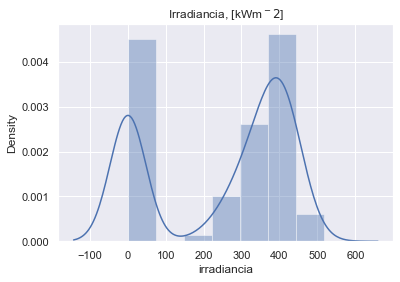

In [10]:
sns.distplot(data_weather['irradiancia']).set_title('Irradiancia, [kWm$^-2$]')

In [11]:
data_weather['Datetime'].dt.year

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
810    2016
811    2016
812    2016
813    2016
814    2016
Name: Datetime, Length: 815, dtype: int64

In [8]:
#checking group ouliers
def seasonality(data, var, location, time):
    plt.figure(figsize=(15,10))
    sns.boxplot(data=data, x=data['Datetime'].dt.year, y=var)
    plt.title(f'Resumen de la Radiación solar en {location} en el año {time}')
    plt.xlabel('Año')
    plt.ylabel(f'{var}')
    plt.grid()
   # plt.savefig('/Users/gloriacarrascal/trabajo-grado/radiación global automáticas/graficas/caribe3.png')
    plt.show()

In [13]:
data_weather.columns.to_list()

['Datetime',
 'altitud',
 'longitud',
 'latitud',
 'dirviento',
 'nubosidad',
 'temperatura',
 'vapor',
 'velviento',
 'rocio',
 'irradiancia']

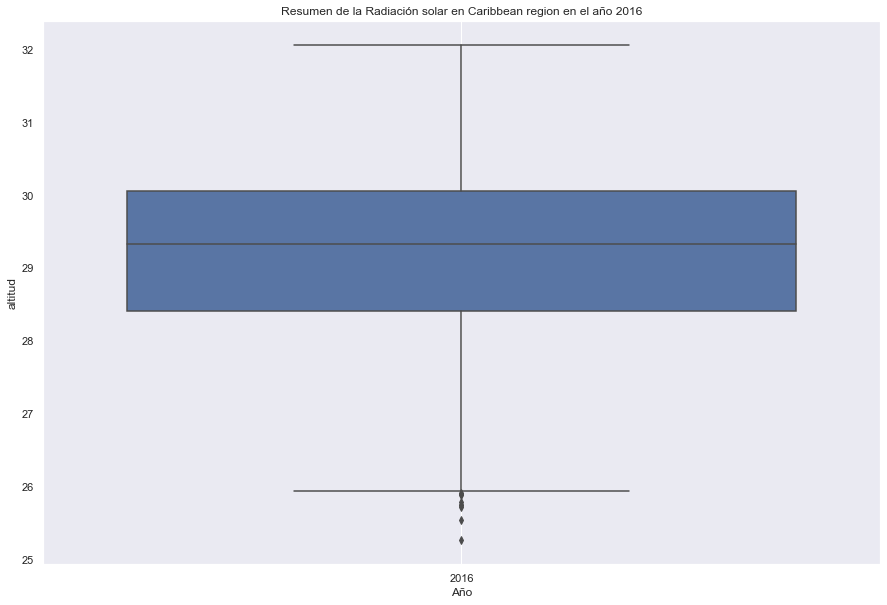

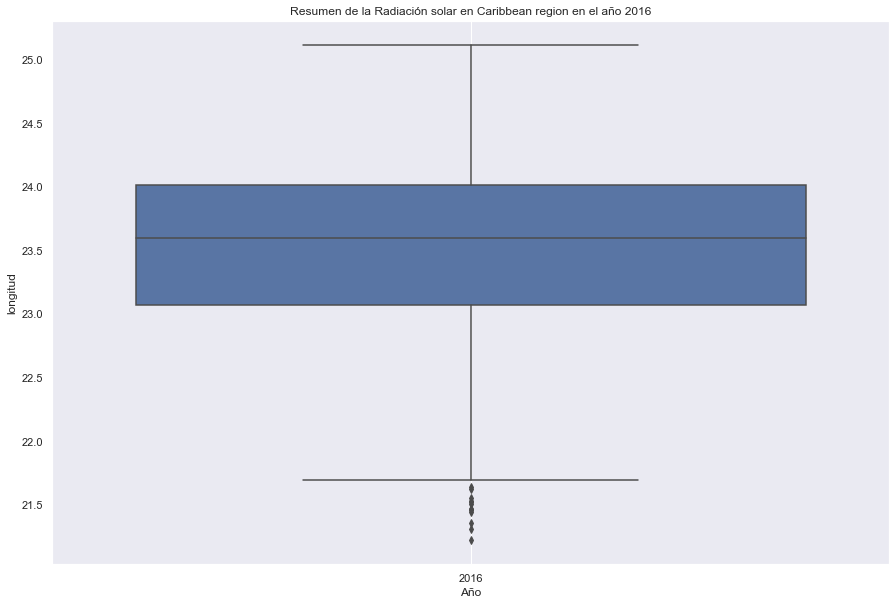

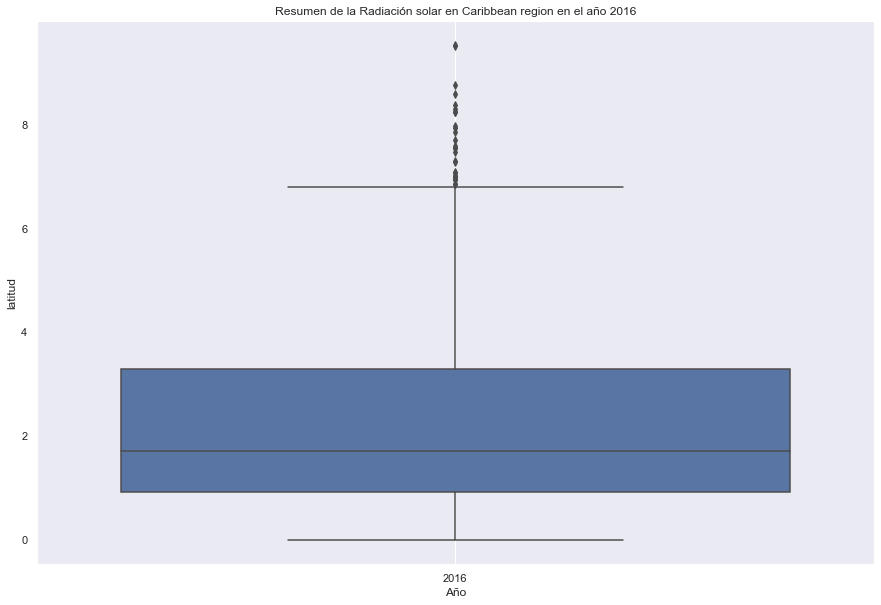

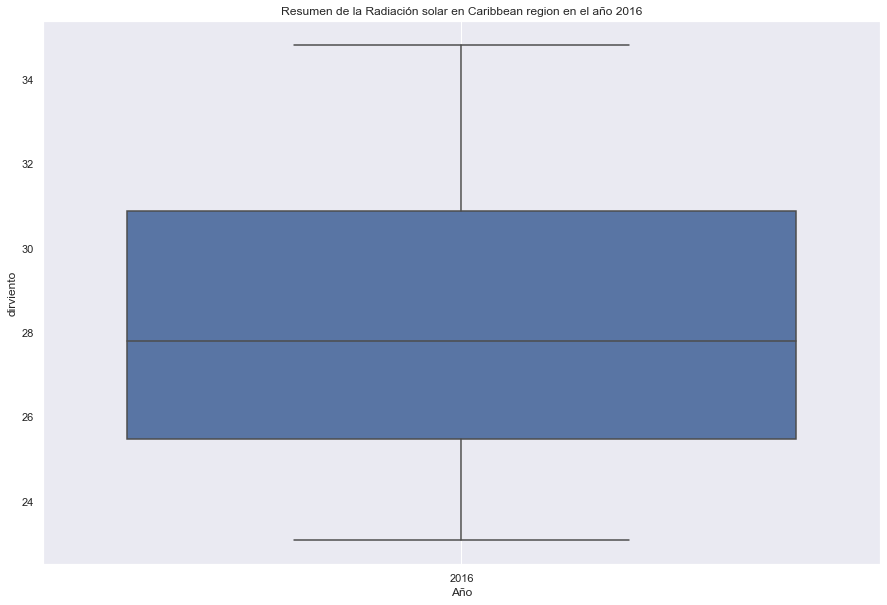

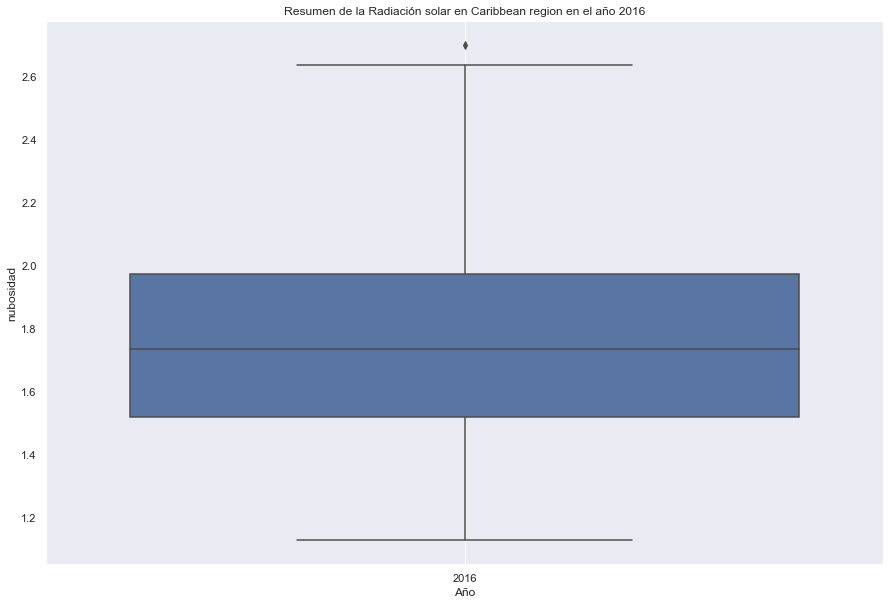

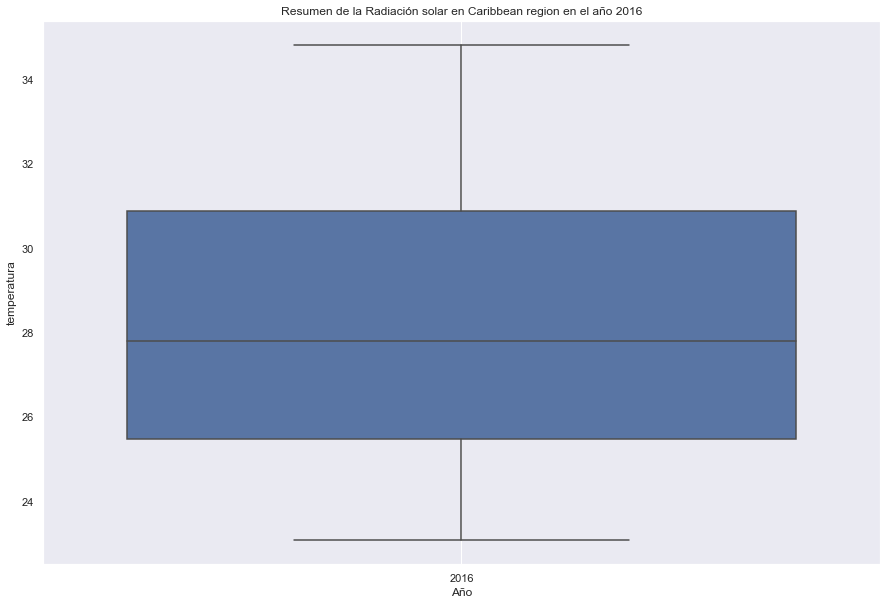

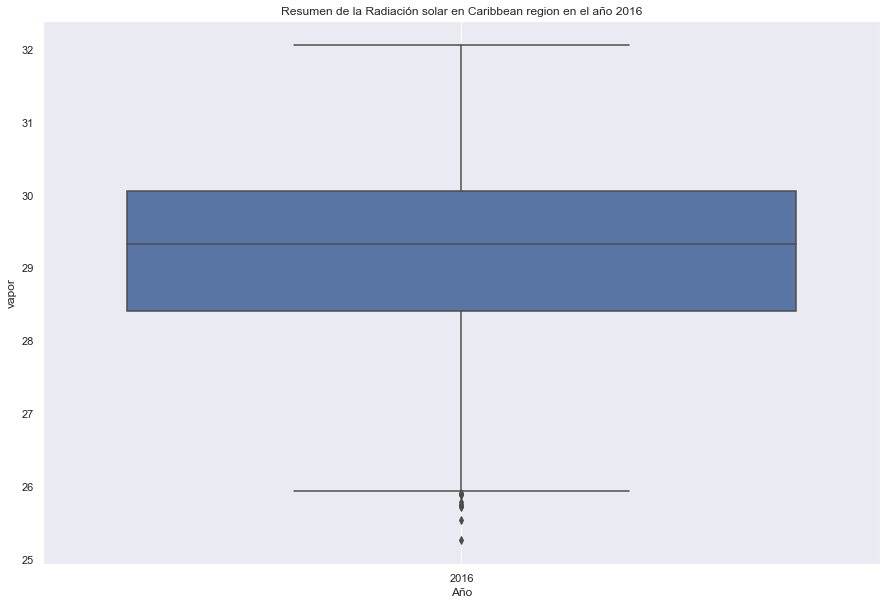

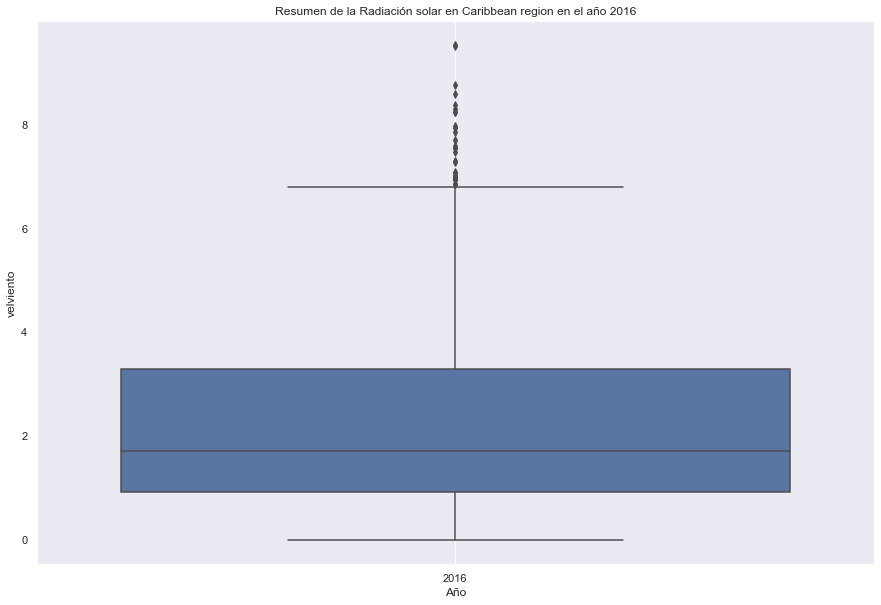

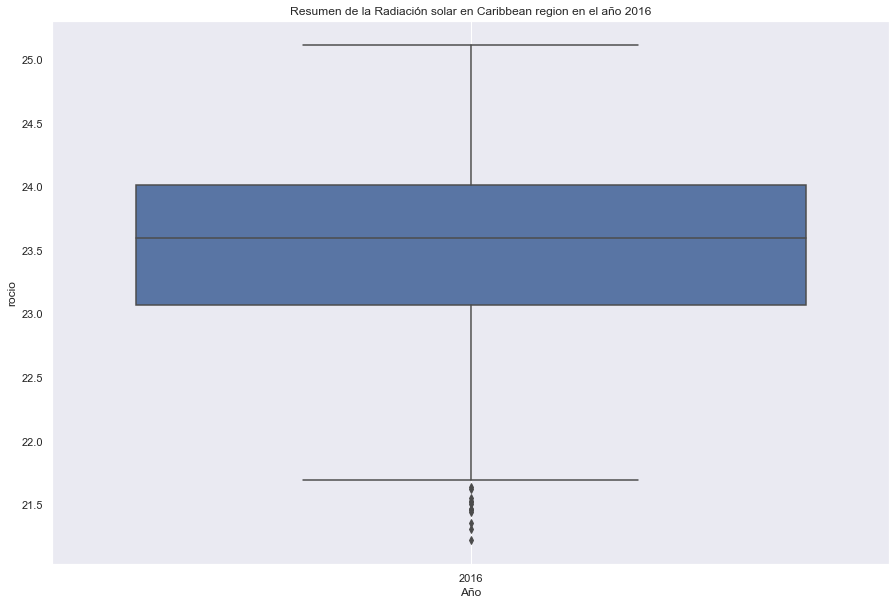

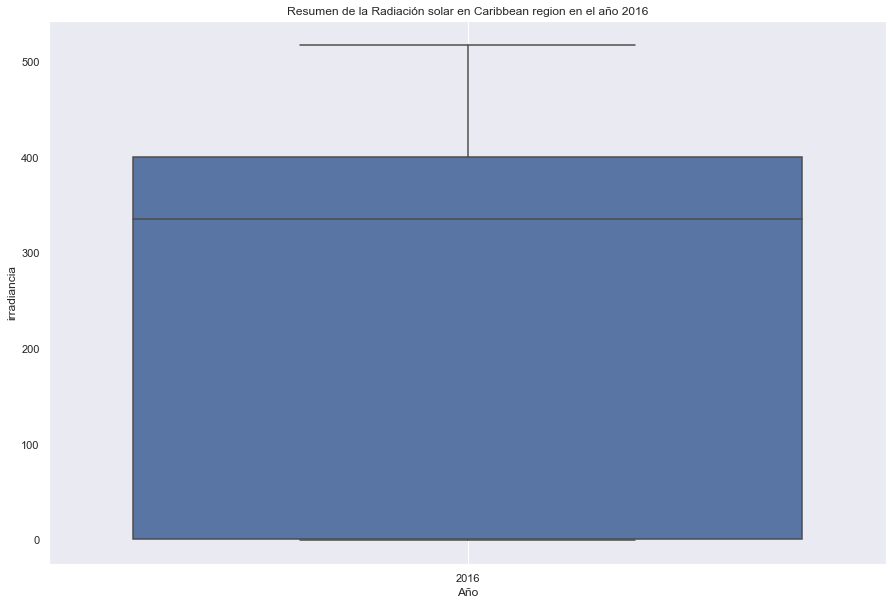

In [9]:
colums = ['altitud',
 'longitud',
 'latitud',
 'dirviento',
 'nubosidad',
 'temperatura',
 'vapor',
 'velviento',
 'rocio',
 'irradiancia']
for colum in colums:
    seasonality(data_weather, colum, "Caribbean region", '2016')
    

In [8]:
col=['velviento', 'vapor','temperatura','nubosidad', 'dirviento', 'latitud', 'longitud', 'altitud', 'irradiancia']
data_weather[col]
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_weather[col]), columns=col)

In [9]:
data_scaled.head()

,velviento,vapor,temperatura,nubosidad,dirviento,latitud,longitud,altitud,irradiancia
0,0.331984,-0.718679,-0.902988,0.377910,-0.902988,0.331984,-0.707884,-0.718679,0.463894
1,0.975889,0.270620,1.168718,0.223084,1.168718,0.975889,0.657719,0.270620,0.268646
2,0.800677,0.450300,-0.082978,0.811498,-0.082978,0.800677,0.349982,0.450300,-1.365237
3,0.126110,-0.792431,-1.123230,1.040877,-1.123230,0.126110,-0.734501,-0.792431,0.318474
4,0.770015,-0.511945,1.055059,0.167002,1.055059,0.770015,-0.479922,-0.511945,0.493503


In [22]:
#data_scaled = data_scaled.rename(columns={'velviento':'wind speed', 'vapor':'steam', 'irradiancia':'irradiance', 'nubosidad': 'cloudiness', 'dirviento':'wind direction', 'altitud':'altitude', 'temperatura':'temperature'})

<AxesSubplot:>

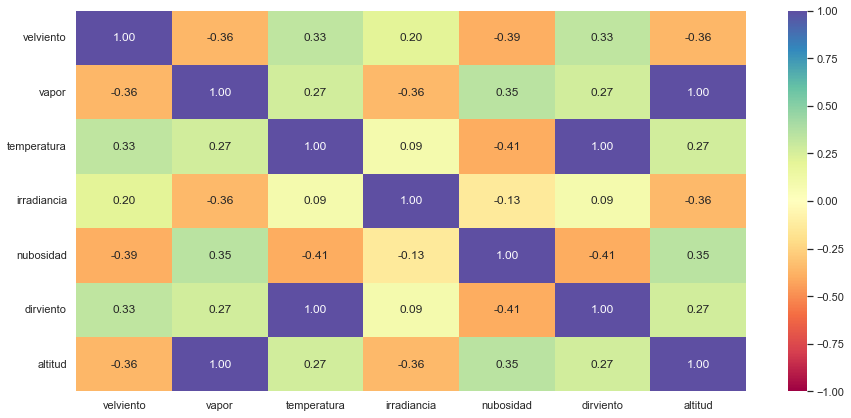

In [28]:
#correlation between weather var and target
plt.figure(figsize=(15,7))
sns.heatmap(data_scaled[['velviento', 'vapor', 'temperatura', 'irradiancia', 
                        'nubosidad', 'dirviento', 'altitud']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")
#plt.title('Correlation Matrix for weather variables and solar irradiance in the Colombian Caribbean Region')

Text(0.5, 1.0, 'Matriz de correlación entre las variables climáticas y la irradiancia')

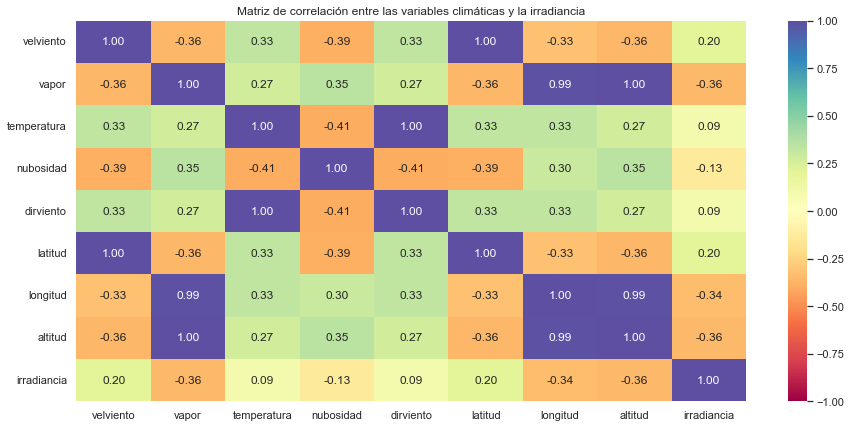

In [29]:
#correlation matriz scaled weather
#correlation between weather var and target
plt.figure(figsize=(15,7))
sns.heatmap(data_scaled.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral", )
plt.title('Matriz de correlación entre las variables climáticas y la irradiancia')

In [23]:
data_scaled = pd.DataFrame(data_scaled, columns=col)

In [24]:
data_scaled.head()

,velviento,vapor,temperatura,nubosidad,dirviento,latitud,longitud,altitud,irradiancia
0,NaN,NaN,NaN,NaN,NaN,0.331984,-0.707884,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.975889,0.657719,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.800677,0.349982,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.126110,-0.734501,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.770015,-0.479922,NaN,NaN


In [18]:
data_scaled = data_scaled.rename(columns={'longitud':'longitude', 'latitud':'latitude'})

In [19]:
data_scaled.head()

,velviento,vapor,temperatura,nubosidad,dirviento,latitude,longitude,altitud,irradiancia
0,NaN,NaN,NaN,NaN,NaN,0.331984,-0.707884,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.975889,0.657719,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.800677,0.349982,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.126110,-0.734501,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.770015,-0.479922,NaN,NaN


In [10]:
#Defining the number of principal components to generate 
n = data_scaled.shape[1]

#Finding principal components for the data
pca1 = PCA(n_components=n, random_state=1)## what is the effect of this random state????
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

In [11]:
data_pca.head()

,0,1,2,3,4,5,6,7,8
0,1.310377,-1.246578,0.411391,-0.541341,0.089748,0.043852,-3.157347e-16,-3.611523e-16,6.194770e-16
1,-0.009313,2.101036,0.412978,-0.703099,-0.435205,0.262257,-8.752448e-16,1.129675e-14,1.244258e-17
2,-0.574852,0.368194,1.911809,0.131502,-0.452108,-0.060297,1.422275e-14,6.920147e-16,1.340919e-17
3,1.074120,-1.846843,0.564125,-0.730629,-0.328951,0.102498,2.958865e-18,-4.110292e-17,-1.529636e-18
4,1.200366,1.374132,-0.147934,-0.478067,-0.926083,-0.030006,5.999335e-17,-1.381198e-17,1.285773e-17


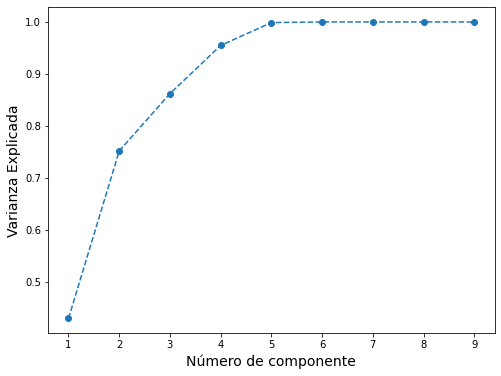

In [83]:
# visulaize the explained variance by individual components
plt.figure(figsize = (8,6))
plt.plot(range(1,10), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
#plt.title("Var")
plt.xlabel("Número de componente", fontsize=14)
plt.ylabel("Varianza Explicada", fontsize=14)
plt.savefig('/Users/gloriacarrascal/trabajo-grado/graficas/eigenvalor_componente.png')
plt.show()

In [13]:
# Components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
  sum = sum + i
  if(sum>0.7):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  2


In [14]:
#Making a new dataframe with first 8 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5],2), index=data_scaled.columns, columns=cols)
pc1.head()

,PC1,PC2,PC3,PC4,PC5
velviento,0.33,0.33,0.49,-0.19,0.10
vapor,-0.47,0.17,0.11,-0.11,0.24
temperatura,-0.04,0.55,-0.25,0.05,-0.36
nubosidad,-0.25,-0.28,0.28,-0.56,-0.68
dirviento,-0.04,0.55,-0.25,0.05,-0.36


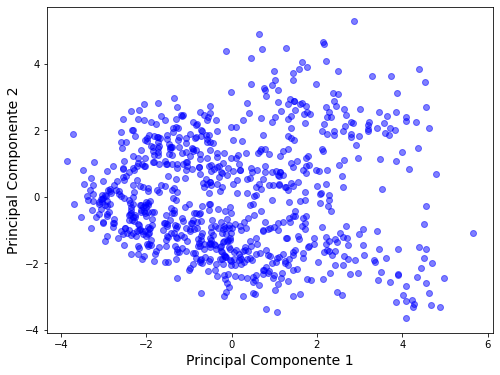

In [34]:
import matplotlib.pyplot as plt

# Select the first and second principal components for the scatter plot
_pc1 = data_pca[0]  # Replace with the appropriate column index
_pc2 = data_pca[1]  # Replace with the appropriate column index

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(_pc1, _pc2, c='blue', alpha=0.5)

plt.xlabel('Principal Componente 1', fontsize=14)
plt.ylabel('Principal Componente 2', fontsize=14)
plt.savefig('/Users/gloriacarrascal/trabajo-grado/graficas/scatter_components.png')

#plt.title('Scatter Plot: PC1 vs PC2')
#plt.grid(False)
plt.show()

In [16]:
def color_high(val):
    if val <= -0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'   
    
pc1.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
velviento,0.330000,0.330000,0.490000,-0.190000,0.100000
vapor,-0.470000,0.170000,0.110000,-0.110000,0.240000
temperatura,-0.040000,0.550000,-0.250000,0.050000,-0.360000
nubosidad,-0.250000,-0.280000,0.280000,-0.560000,-0.680000
dirviento,-0.040000,0.550000,-0.250000,0.050000,-0.360000
latitud,0.330000,0.330000,0.490000,-0.190000,0.100000
longitud,-0.460000,0.200000,0.090000,-0.110000,0.230000
altitud,-0.470000,0.170000,0.110000,-0.110000,0.240000
irradiancia,0.230000,0.040000,-0.530000,-0.760000,0.300000


Text(0, 0.5, 'PC2')

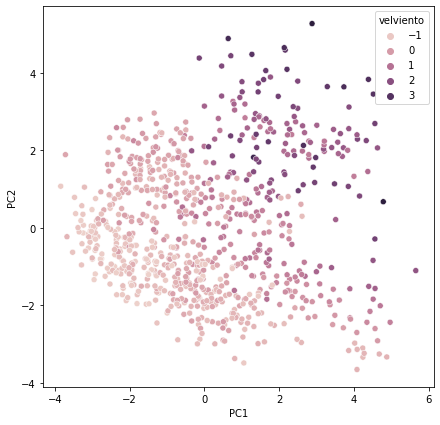

In [37]:
df_concat = pd.concat([data_pca, data_scaled], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='velviento')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

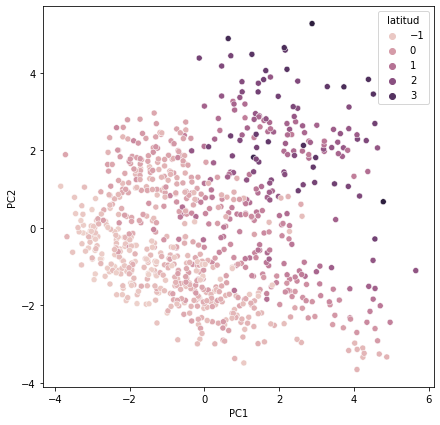

In [38]:
df_concat = pd.concat([data_pca, data_scaled], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='latitud')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

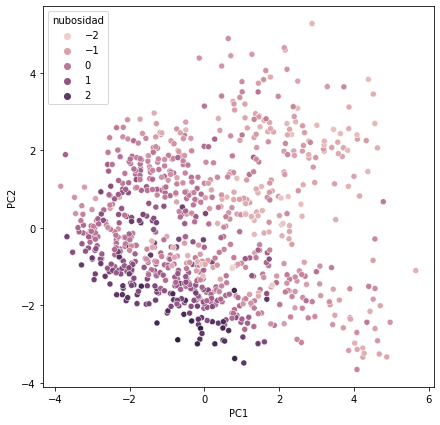

In [39]:
df_concat = pd.concat([data_pca, data_scaled], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='nubosidad')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

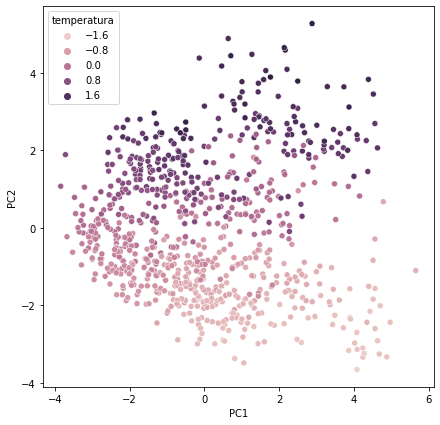

In [40]:
df_concat = pd.concat([data_pca, data_scaled], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='temperatura')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

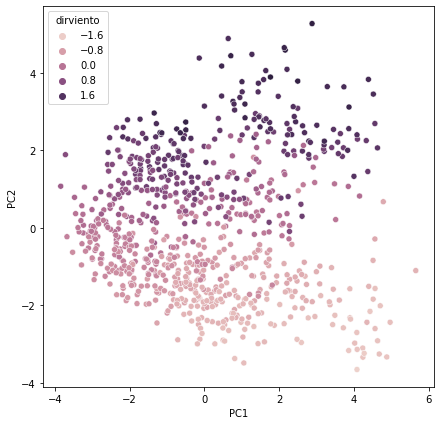

In [41]:
df_concat = pd.concat([data_pca, data_scaled], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='dirviento')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

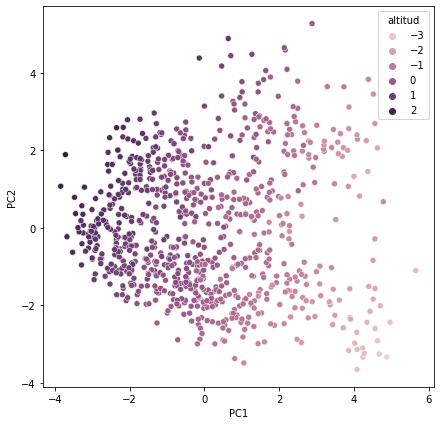

In [42]:
df_concat = pd.concat([data_pca, data_scaled], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='altitud')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

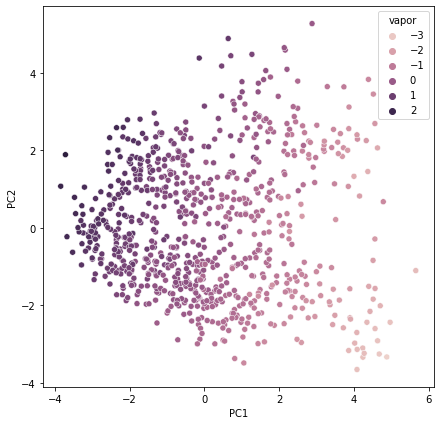

In [43]:
df_concat = pd.concat([data_pca, data_scaled], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='vapor')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

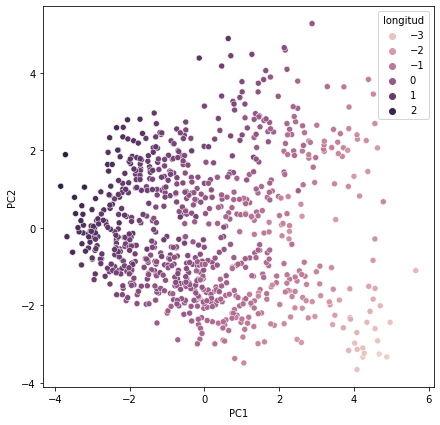

In [44]:
df_concat = pd.concat([data_pca, data_scaled], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='longitud')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [18]:
pc1.index.to_list()

['velviento',
 'vapor',
 'temperatura',
 'nubosidad',
 'dirviento',
 'latitud',
 'longitud',
 'altitud',
 'irradiancia']

In [19]:
pc1['total'] = pc1.PC1+pc1.PC2+pc1.PC3+pc1.PC4

In [20]:
pc1.head()

,PC1,PC2,PC3,PC4,PC5,total
velviento,0.33,0.33,0.49,-0.19,0.10,0.96
vapor,-0.47,0.17,0.11,-0.11,0.24,-0.30
temperatura,-0.04,0.55,-0.25,0.05,-0.36,0.31
nubosidad,-0.25,-0.28,0.28,-0.56,-0.68,-0.81
dirviento,-0.04,0.55,-0.25,0.05,-0.36,0.31


In [21]:
pc1.total.abs()

velviento      0.96
vapor          0.30
temperatura    0.31
nubosidad      0.81
dirviento      0.31
latitud        0.96
longitud       0.28
altitud        0.30
irradiancia    1.02
Name: total, dtype: float64

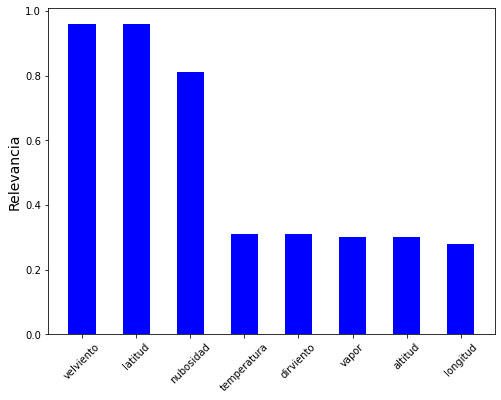

In [33]:
var_weather= ['velviento',
 'vapor',
 'temperatura',
 'nubosidad',
 'dirviento',
 'latitud',
 'longitud',
 'altitud',
 'irradiancia']

data = pc1.total.abs()
filtered_var_weather = [var for var in var_weather if var != 'irradiancia']

if filtered_var_weather:
        # Sort the filtered variables based on PC1 values in increasing order
    sorted_var_weather = sorted(filtered_var_weather, key=lambda var: data[var], reverse=True)
    sorted_pc1_values = [data[var] for var in sorted_var_weather]

    fig, ax = plt.subplots(figsize=(8, 6))
    bar_width = 0.5
    # You can choose different colors for the bars
    ax.bar(sorted_var_weather, sorted_pc1_values, width=bar_width, color='blue')

    #ax.bar(filtered_var_weather, [data[var] for var in filtered_var_weather], width=bar_width, color='blue')

    ax.set_ylabel('Relevancia', fontsize=14)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.savefig('/Users/gloriacarrascal/trabajo-grado/graficas/var_relevance.png')


    plt.show()


In [45]:
#newupc
n_components = 4  # You can choose the number of principal components
pca_siluete = PCA(n_components=n_components)
X_pca = pca_siluete.fit_transform(data_scaled)


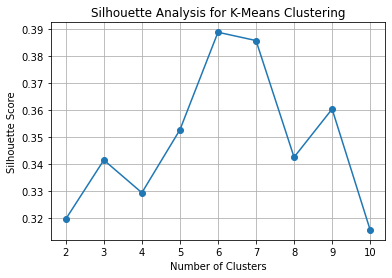

In [50]:
from sklearn.cluster import KMeans

# Assuming you want to try different numbers of clusters (e.g., 2 to 10)
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# You can plot the silhouette scores to determine the optimal number of clusters
import matplotlib.pyplot as plt

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.grid()
plt.show()


In [53]:
data_scaled.head()

,velviento,vapor,temperatura,nubosidad,dirviento,latitud,longitud,altitud,irradiancia
0,0.331984,-0.718679,-0.902988,0.377910,-0.902988,0.331984,-0.707884,-0.718679,0.463894
1,0.975889,0.270620,1.168718,0.223084,1.168718,0.975889,0.657719,0.270620,0.268646
2,0.800677,0.450300,-0.082978,0.811498,-0.082978,0.800677,0.349982,0.450300,-1.365237
3,0.126110,-0.792431,-1.123230,1.040877,-1.123230,0.126110,-0.734501,-0.792431,0.318474
4,0.770015,-0.511945,1.055059,0.167002,1.055059,0.770015,-0.479922,-0.511945,0.493503


In [56]:
from sklearn.impute import SimpleImputer


In [76]:
range_n_clusters = [2, 3, 4, 5, 6]
X = data_scaled[['velviento', 'vapor', 'temperatura', 'nubosidad', 'dirviento', 'latitud', 'longitud', 'altitud', 'irradiancia']]
# Handle missing values (NaN) by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [77]:
print(data_scaled.dtypes)


velviento      float64
vapor          float64
temperatura    float64
nubosidad      float64
dirviento      float64
latitud        float64
longitud       float64
altitud        float64
irradiancia    float64
cluster          int32
dtype: object


For n_clusters = 2 The average silhouette_score is : 0.30396531251606823
For n_clusters = 3 The average silhouette_score is : 0.3257989800077801
For n_clusters = 4 The average silhouette_score is : 0.31310326688551615
For n_clusters = 5 The average silhouette_score is : 0.33230147725430526
For n_clusters = 6 The average silhouette_score is : 0.36606603775795554


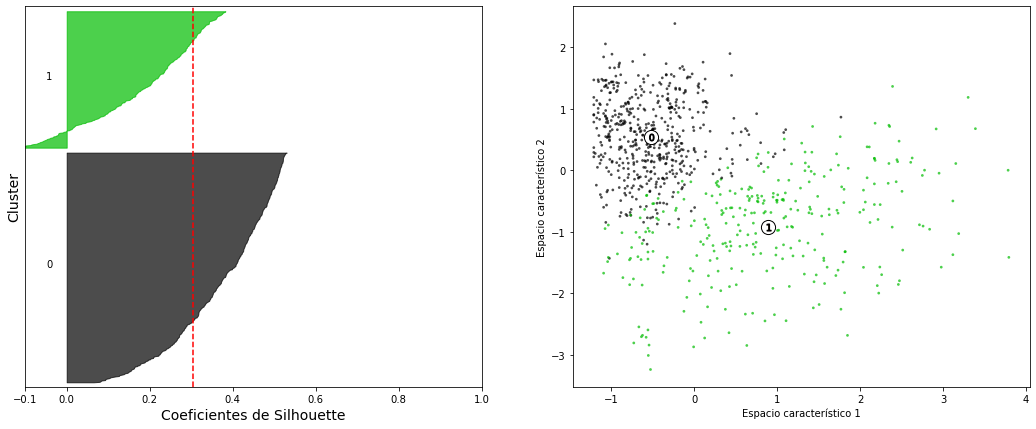

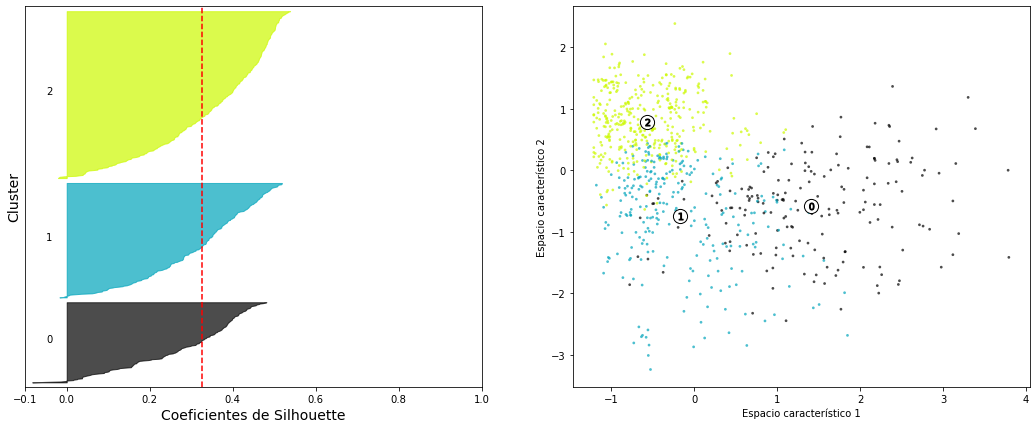

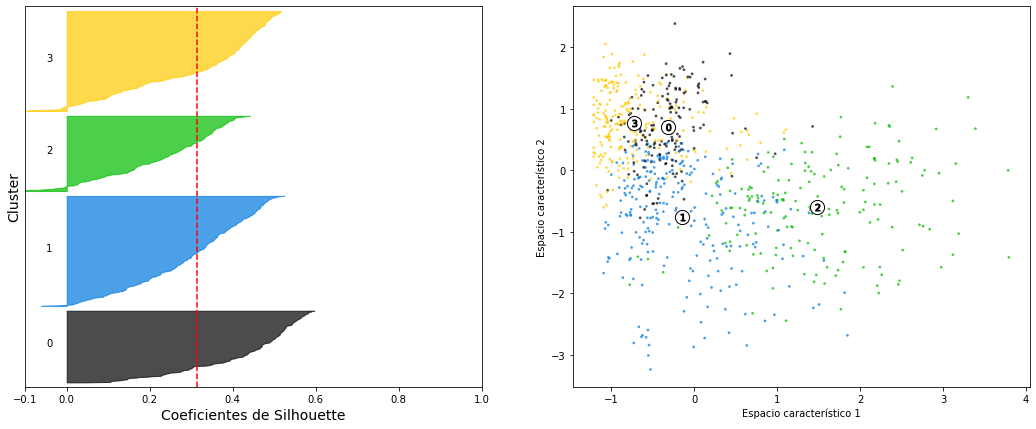

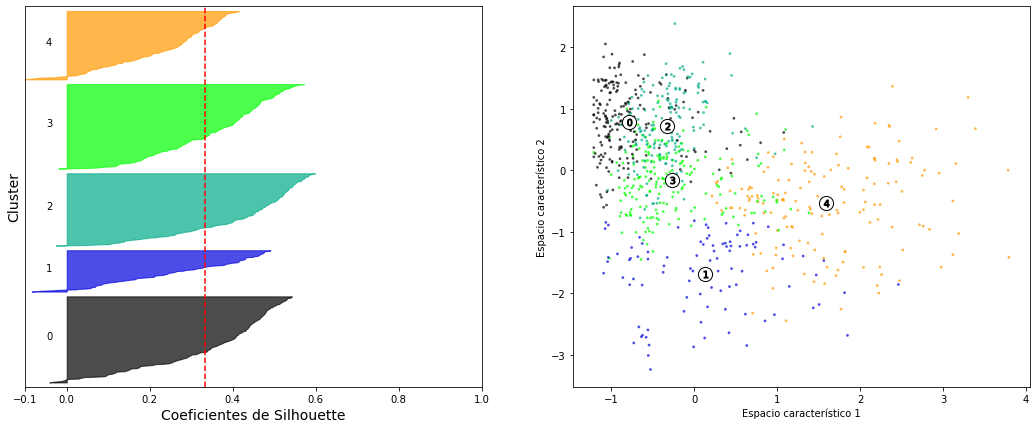

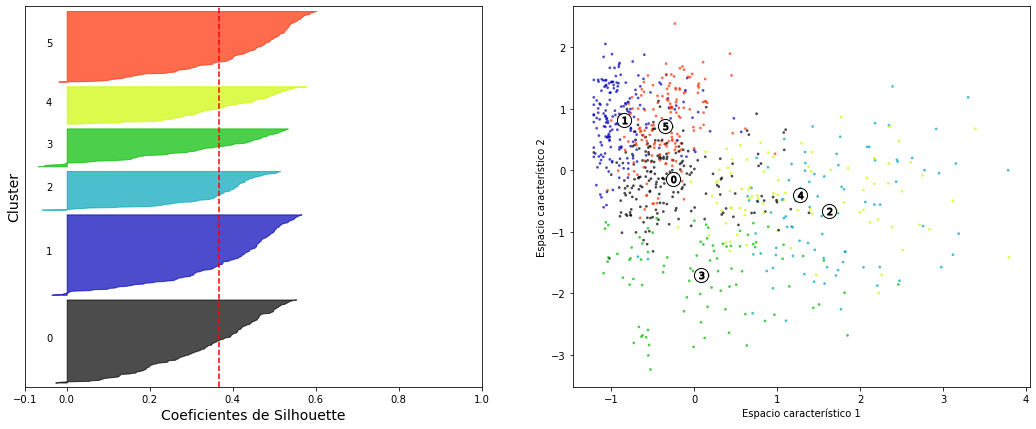

In [84]:


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("Silhouette para varios clusters")
    ax1.set_xlabel("Coeficientes de Silhouette", fontsize=14,)
    ax1.set_ylabel("Cluster", fontsize=14,)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    #ax2.set_title("Visualización del cluster de los datos")
    ax2.set_xlabel("Espacio característico 1")
    ax2.set_ylabel("Espacio característico 2")

    #plt.suptitle(
    #    "Silhouette análisis para KMeans cluster en los datos con n_clusters = %d"
    #    % n_clusters,
    #    fontsize=14,
    #    fontweight="bold",
    #)
    plt.savefig(f'/Users/gloriacarrascal/trabajo-grado/graficas/silhouetter_clusters_{n_clusters}.png')

plt.show()

In [ ]:
var = (exp_var1*100).round(2) 

In [ ]:
var_formatted = [f"{value:.2f}%" for value in var]

In [ ]:
#visualizing the percentaje of data in each component # visulaize the explained variance by individual components
import plotly.express as px

fig = px.bar(
        x=range(1, var.shape[0] + 1),
        y=var,
        text_auto=True,
        labels={"x": "Number of Components", "y": "Percentaje Variance[%]"},
        title="Principal Component Analysis (PCA): Explained Variability of Solar Irradiation and Weather Variables"
        )
# Center the title
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
pca = PCA(0.85)

In [ ]:
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
print("original shape:   ", data_scaled.shape)
print("transformed shape:", data_pca.shape)

original shape:    (815, 9)
transformed shape: (815, 4)


(-1.4792105534908295,
 4.043455671978552,
 -3.520137732708643,
 2.6696542777747747)

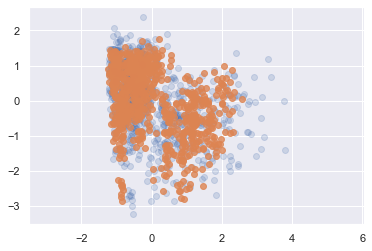

In [ ]:
data_new = pca.inverse_transform(data_pca)
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], alpha=0.2)
plt.scatter(data_new[:, 0], data_new[:, 1], alpha=0.8)
plt.axis('equal')

In [ ]:
data_new.shape

(815, 9)

In [ ]:
# Convert reconstructed data array to DataFrame
reconstructed_df = pd.DataFrame(data_pca, columns=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])


In [ ]:
#merge by item
reconstructed_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,2.006174,1.780540,-1.022455,-0.316326
1,2.572343,-0.845281,-0.498156,-1.020368
2,1.662575,0.655395,-2.202860,-1.014755
3,1.427022,3.227420,-1.373335,-1.082577
4,2.750000,-0.589099,-0.249950,-0.473651


<AxesSubplot:>

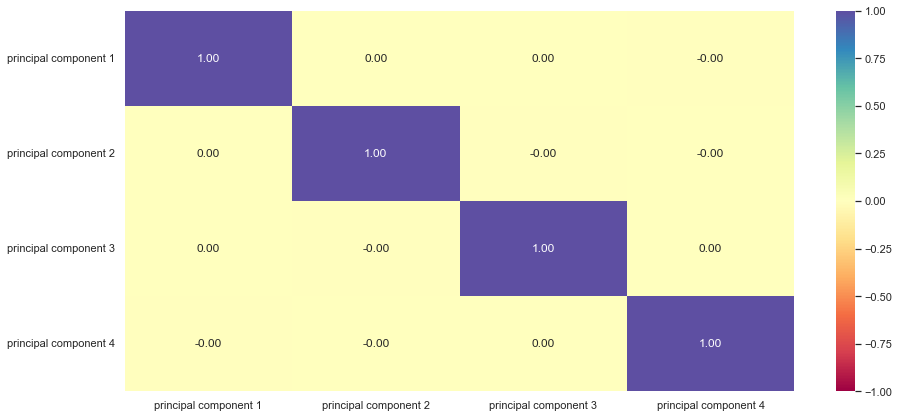

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(reconstructed_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")
#plt.title('Matriz de correlación entre las variables climáticas y la irradiancia')

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))



Explained variation per principal component: [0.4338346  0.19589417 0.14350785 0.09221983]
